## Dependencies:

In [1]:
import sys
!{sys.executable} -m pip install pandasql
import pandasql
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 (SQL):

In [2]:
data = pd.read_csv('Q1_Data.csv')

In [3]:
print(data.shape)

print (data.head())
data['ts'] = data['ts'].astype('datetime64[s]') 

(3553, 4)
            ts user_id country_id site_id
0  2/1/19 0:01  LC36FC        TL6   N0OTG
1  2/1/19 0:10  LC39B6        TL6   N0OTG
2  2/1/19 0:21  LC3500        TL6   N0OTG
3  2/1/19 0:22  LC374F        TL6   N0OTG
4  2/1/19 0:23  LCC1C3        TL6   QGO3G


In [4]:
pandasql.sqldf("SELECT * FROM data LIMIT 10;", globals())

,ts,user_id,country_id,site_id
0,2019-02-01 00:01:00.000000,LC36FC,TL6,N0OTG
1,2019-02-01 00:10:00.000000,LC39B6,TL6,N0OTG
2,2019-02-01 00:21:00.000000,LC3500,TL6,N0OTG
3,2019-02-01 00:22:00.000000,LC374F,TL6,N0OTG
4,2019-02-01 00:23:00.000000,LCC1C3,TL6,QGO3G
5,2019-02-01 00:24:00.000000,LC3E1D,HVQ,GVOFK
6,2019-02-01 00:25:00.000000,LC3561,TL6,3POLC
7,2019-02-01 00:29:00.000000,LC3A01,TL6,N0OTG
8,2019-02-01 00:32:00.000000,LC36FC,TL6,N0OTG
9,2019-02-01 00:35:00.000000,LC3D80,TL6,N0OTG


###### Question 1:
Consider only the rows with country_id = "BDV" (there are 844 such rows). For each site_id, we can compute the number of unique user_id's found in these 844 rows. Which site_id has the largest number of unique users? And what's the number?

###### Answer: 

In [5]:
pandasql.sqldf("\
SELECT site_id, COUNT(DISTINCT(user_id)) AS unique_count \
FROM data WHERE country_id = 'BDV' \
GROUP BY 1 ORDER BY unique_count DESC;", globals())





,site_id,unique_count
0,5NPAU,544
1,N0OTG,90
2,3POLC,2


In [ ]:
SELECT 
    site_id, 
    COUNT(DISTINCT(user_id)) AS unique_count 
FROM data WHERE country_id = 'BDV' 
GROUP BY 1;




###### Question 2:
Between 2019-02-03 00:00:00 and 2019-02-04 23:59:59, there are four users who visited a certain site more than 10 times. Find these four users & which sites they (each) visited more than 10 times. (Simply provides four triples in the form (user_id, site_id, number of visits) in the box below.)

###### Answer:

In [6]:
pandasql.sqldf("SELECT user_id, site_id, visits FROM (SELECT site_id, user_id, COUNT(*) AS visits FROM data WHERE ts BETWEEN '2019-02-03 00:00:00' and '2019-02-04 23:59:59' GROUP BY 1,2) WHERE visits > 10 GROUP BY 1,2,3 ;", globals())





,user_id,site_id,visits
0,LC06C3,N0OTG,25
1,LC3A59,N0OTG,26
2,LC3C7E,3POLC,15
3,LC3C9D,N0OTG,17


In [ ]:
SELECT 
    user_id, 
    site_id, 
    visits 
FROM 
    (SELECT 
         site_id, 
         user_id, 
         COUNT(*) AS visits 
     FROM data 
     WHERE ts BETWEEN '2019-02-03 00:00:00' and '2019-02-04 23:59:59' 
     GROUP BY 1,2) 
WHERE visits > 10 
GROUP BY 1,2,3 ;





###### Question 3:
For each site, compute the unique number of users whose last visit (found in the original data set) was to that site. For instance, user "LC3561"'s last visit is to "N0OTG" based on timestamp data. Based on this measure, what are top three sites? (hint: site "3POLC" is ranked at 5th with 28 users whose last visit in the data set was to 3POLC; simply provide three pairs in the form (site_id, number of users).)

###### Answer:

In [7]:
pandasql.sqldf("SELECT d.site_id, count(DISTINCT(d.user_id)) as site_count \
FROM data as d \
INNER JOIN \
(SELECT MAX(ts) as recent, user_id \
FROM data GROUP BY 2 ORDER BY 1 ASC) as e \
ON d.user_id = e.user_id AND d.ts = e.recent GROUP BY 1 \
ORDER BY site_count DESC LIMIT 3;", globals())





,site_id,site_count
0,5NPAU,992
1,N0OTG,561
2,QGO3G,289


In [ ]:
SELECT 
    d.site_id, 
    count(DISTINCT(d.user_id)) as site_count
FROM data as d 
INNER JOIN 
(
    SELECT 
        MAX(ts) as recent, 
        user_id
    FROM data 
    GROUP BY 2 
    ORDER BY 1 ASC) as e
ON d.user_id = e.user_id AND d.ts = e.recent 
GROUP BY 1
ORDER BY site_count DESC
LIMIT 3;





###### Question 3:

For each user, determine the first site he/she visited and the last site he/she visited based on the timestamp data. Compute the number of users whose first/last visits are to the same website. What is the number?

###### Answer:

In [8]:
pandasql.sqldf("\
WITH \
f as (SELECT MAX(ts) as ts, user_id FROM data GROUP BY 2), \
f2 as (SELECT f2.user_id, f2.site_id, f2.ts FROM data f2 INNER JOIN f ON f.ts = f2.ts and f.user_id = f2.user_id), \
l as (SELECT MIN(ts) as ts, user_id FROM data GROUP BY 2), \
l2 as (SELECT l2.user_id, l2.site_id, l2.ts FROM data l2 INNER JOIN l ON l.ts = l2.ts and l.user_id = l2.user_id) \
SELECT COUNT(DISTINCT(f2.user_id)) FROM f2 \
INNER JOIN l2 ON f2.user_id = l2.user_id and f2.site_id = l2.site_id and f2.ts != l2.ts ;", globals())





,COUNT(DISTINCT(f2.user_id))
0,396


In [ ]:

WITH 

f as (
    SELECT MAX(ts) as ts, 
        user_id FROM data 
    GROUP BY 2
    ),
f2 as (
    SELECT f2.user_id, 
        f2.site_id, 
        f2.ts FROM data f2 
    INNER JOIN f ON f.ts = f2.ts 
    and f.user_id = f2.user_id
    ),
l as (
    SELECT MIN(ts) as ts, 
        user_id 
    FROM data 
    GROUP BY 2),
l2 as (
    SELECT l2.user_id, 
        l2.site_id, 
        l2.ts 
        FROM data l2 
    INNER JOIN l ON l.ts = l2.ts 
    and l.user_id = l2.user_id
    )

SELECT 
    COUNT(DISTINCT(f2.user_id)) 
FROM f2 
INNER JOIN l2 ON f2.user_id = l2.user_id 
and f2.site_id = l2.site_id 
and f2.ts != l2.ts ;





## Part 2 (Regression):

###### Question 3:
The data contains 300 rows and 3 columns (from the left, A, B, and C). Please build a good regression model which explains column C by a function of  A and B. 

Note: Please do not use any ML libraries or packages. You can simply attach plot of data points and your regression model that fits the data points and of course, code point (preferably Github).

###### Answer: * I got rid of the negative outlier as it was affecting the scale of the plot*


In [9]:
df = pd.read_csv('Q2_Data.csv')

print(df.shape)

print(df.head())

(299, 3)
    A  B    C
0  11  6 -315
1  11  6 -289
2  11  6 -288
3  10  7 -286
4  12  6 -286


Text(0, 0.5, 'Values')

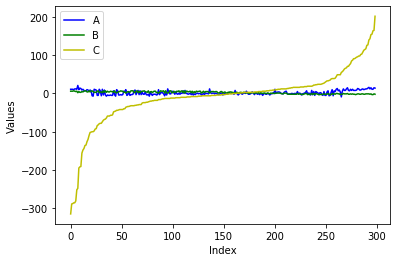

In [10]:
plt.plot(df.A, 'b-', label='A')
plt.plot(df.B, 'g-', label='B')
plt.plot(df.C, 'y-', label='C')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Index')
plt.ylabel('Values')

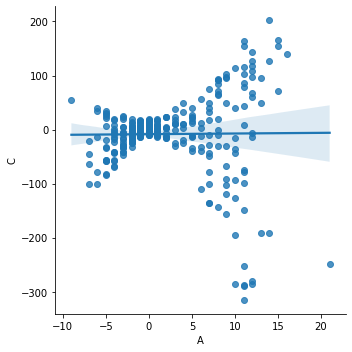

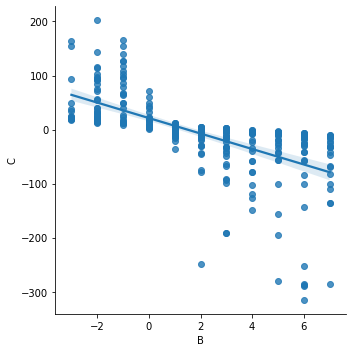

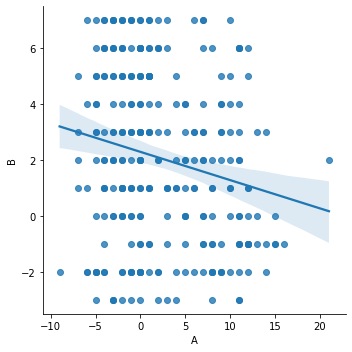

In [11]:
print(sns.lmplot(x="A", y="C",data=df))

print(sns.lmplot(x="B", y="C",data=df))

print(sns.lmplot(x="A", y="B",data=df))